In [1]:
import matplotlib.pyplot as plt

In [2]:
from settings import param_file
label_size      = 0.7* param_file.params["Fig_OOB_GOF"]["label_size"] 
ticklabel_size  = 0.6*param_file.params["Fig_OOB_GOF"]["ticklabel_size"] 
title_size      = 0.7*param_file.params["Fig_OOB_GOF"]["title_size"] 
hspace          = param_file.params["Fig_OOB_GOF"]["hspace"] 
wspace          = param_file.params["Fig_OOB_GOF"]["wspace"] 
legend_lbl_size = 0.7*param_file.params["Fig_OOB_GOF"]["legend_lbl_size"] 
title_mapper      = param_file.params["Fig_OOB_GOF"]["titles"]

In [60]:

# (WQTP, LM, RF)
with_lag_nse = [("MFWQTC",0.24,0.35),
                ("DRGWQTC",0.76,0.79),
                ("CCWQTC",0.57, 0.62),
                ("FFWQTP", 0.78, 0.78),
                ("HCWQTP", 0.79,0.78)
                ]
no_lag_nse = [("MFWQTC",-0.05,0.26),
                ("DRGWQTC",0.52,0.58),
                ("CCWQTC",0.15, 0.42),
                ("FFWQTP", 0.67, 0.71),
                ("HCWQTP", 0.48,0.52)
                ]

with_lag_nseln = [("MFWQTC",0.36,0.52),
                ("DRGWQTC",0.76,0.84),
                ("CCWQTC",0.69, 0.74),
                ("FFWQTP", 0.76, 0.82),
                ("HCWQTP", 0.81,0.80)
                ]
no_lag_nseln = [("MFWQTC",0.02,0.38),
                ("DRGWQTC",0.32,0.43),
                ("CCWQTC",0.23, 0.55),
                ("FFWQTP", 0.55, 0.61),
                ("HCWQTP", 0.51,0.57)
                ]




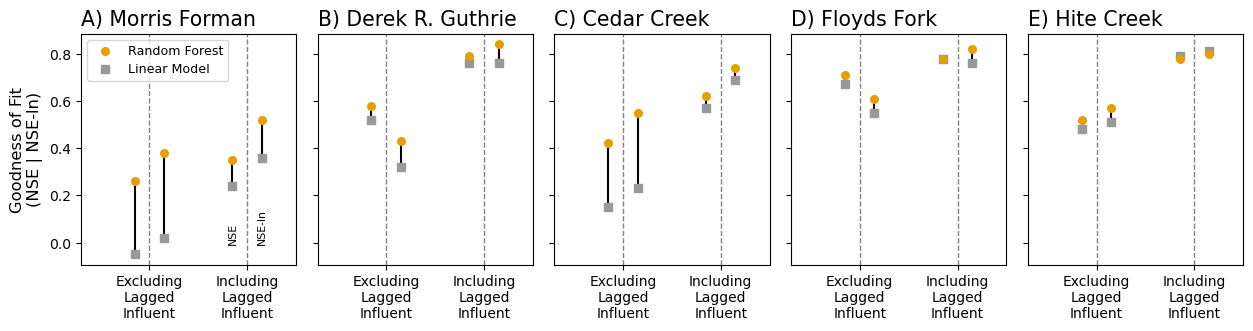

In [71]:
fig, axs = plt.subplots(1,5, sharey = True, sharex = True, figsize = (15,3))
colors = ["#999999","#E69F00",]
pad = 0.15
ax_idx = 0
for wo_nse, wo_nseln,w_nse, w_nseln in zip(no_lag_nse,no_lag_nseln, with_lag_nse, with_lag_nseln):
    ax = axs[ax_idx]
    name, lm, RF = zip(*[wo_nse, wo_nseln,w_nse, w_nseln])
    x = [1-pad, 1+pad, 2-pad, 2+ pad]
    lghand1 = ax.scatter(x,lm, marker = "s", color = colors[0], zorder = 1, s = 30)
    lghand2 = ax.scatter(x,RF, marker = "o", color = colors[1], zorder = 1, s = 30)
    ax_idx += 1
    ax.axvline(1, linestyle = '--', color = "grey", linewidth = 1)
    ax.axvline(2, linestyle = '--', color = "grey", linewidth = 1)
    for xcoord, lmgof, rfgof in zip(x,lm,RF):
        xarr = [xcoord, xcoord]
        yarr = [lmgof, rfgof]
        ax.plot(xarr, yarr, zorder = 0, color= "k")
    ax.set_title(title_mapper[wo_nse[0]+"(MGD)"], fontsize = title_size*1.5, loc = "left" )
ax.set_xlim(0.3, 2.5)  
axs[0].legend([lghand2,lghand1], ["Random Forest","Linear Model"], loc = "upper left", fontsize = label_size)  
axs[0].set_xticks([1,2])
axs[0].set_xticklabels(["Excluding\nLagged\nInfluent", "Including\nLagged\nInfluent"])
axs[0].set_ylabel("Goodness of Fit\n(NSE | NSE-ln)", fontsize = title_size*1.2)
axs[0].annotate("NSE", xy = (2-pad,0), rotation = 90, ha = "center",fontsize = title_size*0.8 )
axs[0].annotate("NSE-ln", xy = (2+pad,0), rotation = 90, ha = "center",fontsize = title_size*0.8 )
fig.subplots_adjust(wspace = 0.1)
plt.savefig("./Results/Figs/GOF_comparison.png", dpi = 300, bbox_inches='tight')